# Final Project Python 050 Alfan S. Praja
Data yang digunakan merupakan data cuaca yang diperoleh dari 
https://www.kaggle.com/budincsevity/szeged-weather


Tipe presipitasi yang terekam dalam data tersebut adalah hujan dan salju. pengaruh temperatur sangat erat kaitannya dengan tipe presipitasi. temperatur > 0 , umumnya akan mengalami presipitasi jenis hujan. sedangkan temperatur < 0 umumnya mengalami presipitasi tipe salju. pada penelitian ini akan diprediksi tipe presipitasi hujan berdasarkan nilai parameter Humidity, Pressure dan Kecepatan angin. 

In [180]:
# Get your import statement here
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [181]:
#Load your dataset here
dfw = pd.read_csv('dataset/weatherHistory.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [182]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


selanjutnya memeriksa keberadaan null data pada data yang diolah.

In [183]:
round(100*(dfw.isnull().sum()/len(dfw.index)),2)

Formatted Date              0.00
Summary                     0.00
Precip Type                 0.54
Temperature (C)             0.00
Apparent Temperature (C)    0.00
Humidity                    0.00
Wind Speed (km/h)           0.00
Wind Bearing (degrees)      0.00
Visibility (km)             0.00
Loud Cover                  0.00
Pressure (millibars)        0.00
Daily Summary               0.00
dtype: float64

Pada data Precip Type terdapat 0,54% data yang null, sehingga selanjutnya akan di drop data tersebut.

In [184]:
dfwn = dfw.dropna()

In [185]:
dfwn.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [186]:
dfwn.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [187]:
dfwn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [188]:
dfwn.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


<AxesSubplot:title={'center':'Pressure (millibars)'}, xlabel='Precip Type'>

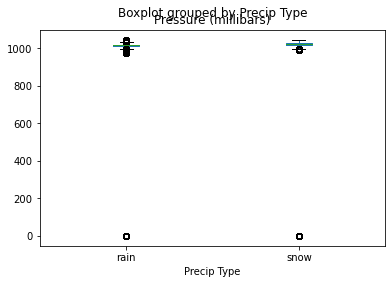

In [189]:
dfwn.boxplot(by ='Precip Type', column =['Pressure (millibars)'], grid = False)

Terdapat kenehan data dari boxplot diatas. Ada data dengan nilai pressure = 0 millibar. 
hal ini tidak benar, karena nila tekanan di bumi sellau bernilai diatas 800 millibar. sehingga nilai 0 tersebut kembali di drop. dalam hal ini didefinisikan kembali data baru yaitu dfwn1




In [190]:
dfwn1 = dfwn[dfwn['Pressure (millibars)']>=1]

In [191]:
dfwn1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,94648.000000,94648.000000,94648.000000,94648.000000,94648.000000,94648.000000,94648.0,94648.000000
mean,11.957784,10.886063,0.734906,10.778381,187.437241,10.397360,0.0,1016.801221
std,9.565622,10.707436,0.195845,6.899242,107.407977,4.167584,0.0,7.769901
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,973.780000
25%,4.655556,2.305556,0.600000,5.779900,116.000000,8.420300,0.0,1012.110000
50%,12.061111,12.061111,0.780000,9.901500,180.000000,10.046400,0.0,1016.530000
75%,18.855556,18.855556,0.890000,14.103600,290.000000,14.908600,0.0,1021.130000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [192]:
#First, let's check which columns should be categorical
print('Column name')
for col in dfwn1.columns:
    if dfwn1[col].dtype=='object':
        print(col, dfwn1[col].nunique())

Column name
Formatted Date 94624
Summary 27
Precip Type 2
Daily Summary 214


In [193]:
#dfwn1['Temperature (C)']

In [194]:
dfwn1.shape

(94648, 12)

In [195]:
numer = ['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']
for col in numer: # coerce for missing values
    dfwn1[col] = pd.to_numeric(dfwn1[col], errors='coerce')

categ = ['Summary', 'Daily Summary', 'Precip Type']
for col in categ:
    dfwn1[col] = dfwn1[col].astype('category')

dfwn1['Formatted Date'] = pd.to_datetime(dfwn1['Formatted Date'], errors='coerce')

<ipython-input-195-652870ae8b9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwn1[col] = pd.to_numeric(dfwn1[col], errors='coerce')
<ipython-input-195-652870ae8b9c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwn1[col] = dfwn1[col].astype('category')
<ipython-input-195-652870ae8b9c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [196]:
for x in categ:
    print(dfwn1[x].value_counts(),'\n')

Partly Cloudy                          31513
Mostly Cloudy                          27780
Overcast                               16361
Clear                                  10035
Foggy                                   7019
Breezy and Overcast                      525
Breezy and Mostly Cloudy                 511
Breezy and Partly Cloudy                 379
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   63
Light Rain                                63
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Dry                                       34
Windy and Mostly Cloudy                   34
Breezy                                    30
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Humid and Overcast                         7
Windy and 

In [197]:
dfwn1[['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary']].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,94648.000000,94648.000000,94648.000000,94648.000000,94648.000000,94648.000000,94648.0,94648.000000
mean,11.957784,10.886063,0.734906,10.778381,187.437241,10.397360,0.0,1016.801221
std,9.565622,10.707436,0.195845,6.899242,107.407977,4.167584,0.0,7.769901
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,973.780000
25%,4.655556,2.305556,0.600000,5.779900,116.000000,8.420300,0.0,1012.110000
50%,12.061111,12.061111,0.780000,9.901500,180.000000,10.046400,0.0,1016.530000
75%,18.855556,18.855556,0.890000,14.103600,290.000000,14.908600,0.0,1021.130000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


selanjutnya akan dibuat model untuk memprediksi tipe hujan jika diketahui nilai 3 parameter cuaca yaitu temperatur, humidity dan pressure

In [198]:
dfwn1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [199]:
dfwn1.columns.values

array(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'], dtype=object)

In [200]:
missing = dfwn1.isnull().sum()/len(dfwn1)*100

print(pd.DataFrame([missing[missing>0],pd.Series(dfwn1.isnull().sum()[dfwn1.isnull().sum()>1000])], index=['percent missing','how many missing']))

Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


data sudah tidak memiliki missing value

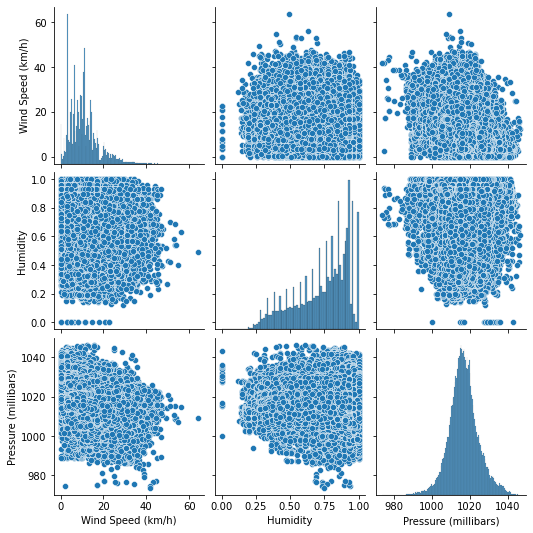

In [201]:
abc1 = dfwn1[['Wind Speed (km/h)',
       'Humidity', 'Pressure (millibars)']]
sns.pairplot(abc1)

<AxesSubplot:title={'center':'Wind Speed (km/h)'}, xlabel='Precip Type'>

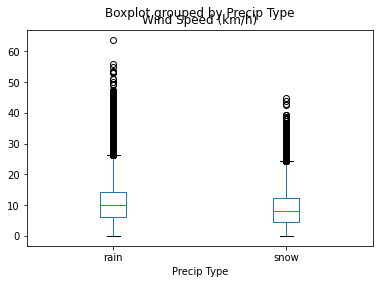

In [202]:
dfwn1.boxplot(by ='Precip Type', column =['Wind Speed (km/h)'], grid = False)

<AxesSubplot:title={'center':'Humidity'}, xlabel='Precip Type'>

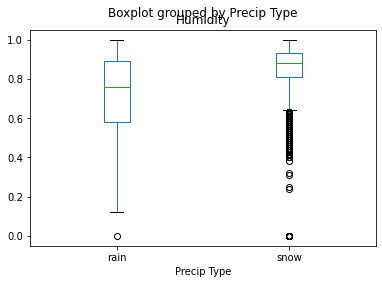

In [203]:
dfwn1.boxplot(by ='Precip Type', column =['Humidity'], grid = False)

<AxesSubplot:title={'center':'Pressure (millibars)'}, xlabel='Precip Type'>

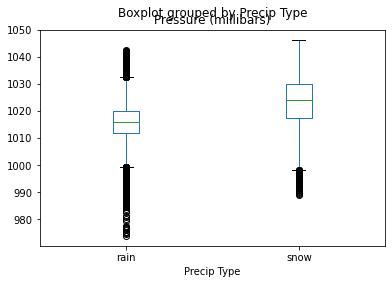

In [204]:
dfwn1.boxplot(by ='Precip Type', column =['Pressure (millibars)'], grid = False)

seperti yang telah disebutkan pada pendahuluan, bahwa temperatur tidak diikutkan dalam perhitungan model, disebabkan oleh kaitan yang erat dengan tipe presipitasi. seperti terlihat pada tabel berikut

In [205]:
#dfwn[dfwn['Pressure (millibars)']>=1].describe()
dfwn1[dfwn1['Precip Type']=='rain'].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,84116.000000,84116.000000,84116.000000,84116.000000,84116.000000,84116.000000,84116.0,84116.000000
mean,13.863878,13.028233,0.718678,10.948931,189.032110,10.865890,0.0,1015.973249
std,8.314205,9.270734,0.198155,6.929410,107.113006,3.856856,0.0,7.122631
min,0.005556,-7.550000,0.000000,0.000000,0.000000,0.000000,0.0,973.780000
25%,7.172222,5.116667,0.580000,6.037500,119.000000,9.949800,0.0,1011.780000
50%,13.311111,13.311111,0.760000,10.223500,181.000000,10.352300,0.0,1016.000000
75%,19.900000,19.900000,0.890000,14.200200,290.000000,14.956900,0.0,1020.150000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1042.380000


In [206]:
#dfwn1[dfwn1['Humidity']<=.1].count()
dfwn1[dfwn1['Precip Type']=='snow'].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.0,10532.000000
mean,-3.265628,-6.222824,0.864513,9.416244,174.699487,6.655350,0.0,1023.413994
std,3.071458,3.810959,0.110392,6.494915,108.905498,4.639924,0.0,9.389495
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,988.900000
25%,-4.844444,-8.122222,0.810000,4.604600,81.000000,2.978500,0.0,1017.310000
50%,-2.308333,-5.588889,0.880000,8.066100,170.000000,5.973100,0.0,1024.000000
75%,-1.094444,-3.772222,0.930000,12.493600,274.000000,9.982000,0.0,1030.100000
max,0.000000,0.000000,1.000000,44.886800,359.000000,16.100000,0.0,1046.380000


In [207]:
#pertama dengna mengubah label pada precip type
from sklearn.preprocessing import LabelEncoder
target_label = dfwn1['Precip Type'].values
print('data tipe hujan before: ',target_label)
label_encoder = LabelEncoder().fit(target_label)
target_label_after = label_encoder.transform(target_label)
print('data tipe hujan after: ',target_label_after)
print('class before transform: ',label_encoder.classes_)

data tipe hujan before:  ['rain', 'rain', 'rain', 'rain', 'rain', ..., 'rain', 'rain', 'rain', 'rain', 'rain']
Length: 94648
Categories (2, object): ['rain', 'snow']
data tipe hujan after:  [0 0 0 ... 0 0 0]
class before transform:  ['rain' 'snow']


In [208]:
dfwn1['Percip_Type_label_encode'] = target_label_after
#dfwn['target_label_encode'] = target_label_after
dfwn1[['Precip Type','Percip_Type_label_encode']].head()

<ipython-input-208-4c61817181ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwn1['Percip_Type_label_encode'] = target_label_after


,Precip Type,Percip_Type_label_encode
0,rain,0
1,rain,0
2,rain,0
3,rain,0
4,rain,0


In [209]:
dfwn1.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Percip_Type_label_encode'],
      dtype='object')

In [210]:
from sklearn.model_selection import train_test_split

#features_data = df[['age']].values.reshape(-1,1)
#features_data = df[['age','job_label_encode']].values
features_data = dfwn1[['Wind Speed (km/h)',
       'Humidity', 'Pressure (millibars)']].values
target_data = dfwn1[['Percip_Type_label_encode']].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(features_data,target_data,test_size=0.25)
#x_train
y_test = y_test.reshape(len(y_test))
y_train = y_train.reshape(len(y_train))
print('shape feature total: ',features_data.shape)
print('shape feature train: ',x_train.shape)
print('shape feature test: ',x_test.shape)
print('shape target test: ',y_test.shape)

shape feature total:  (94648, 3)
shape feature train:  (70986, 3)
shape feature test:  (23662, 3)
shape target test:  (23662,)


In [211]:
x_train

array([[7.18060e+00, 7.90000e-01, 1.02218e+03],
       [4.76560e+00, 9.30000e-01, 1.01513e+03],
       [1.29122e+01, 4.20000e-01, 1.01246e+03],
       ...,
       [8.09830e+00, 2.70000e-01, 1.01734e+03],
       [1.36528e+01, 8.00000e-01, 1.01936e+03],
       [9.35410e+00, 9.50000e-01, 1.02082e+03]])

# Pendefinisian Model


## Regresi Logistic

In [212]:
# create model
from sklearn.linear_model import LogisticRegression # logistic regression
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
model_Reg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model_Reg.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [213]:
# prediksi output
y_pred1 = model_Reg.predict(x_test)
print(y_pred1)
print('nilai akurasi menggunakan data training adalah', model_Reg.score(x_train, y_train))
print('nilai akurasi  menggunakan data testing adalah', model_Reg.score(x_test, y_test))

[0 0 0 ... 0 0 0]
nilai akurasi menggunakan data training adalah 0.8889640210745781
nilai akurasi  menggunakan data testing adalah 0.8880060857070409


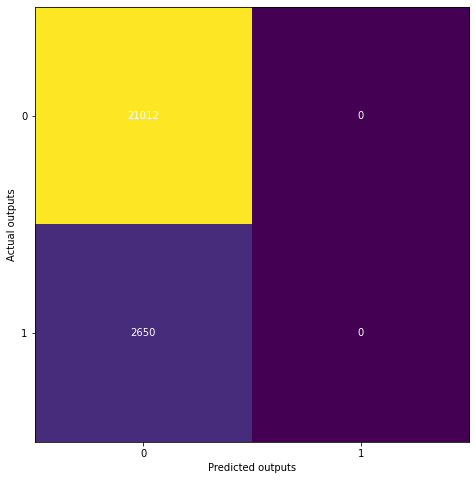

In [214]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred1)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [215]:

# summary model
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21012
           1       0.00      0.00      0.00      2650

    accuracy                           0.89     23662
   macro avg       0.44      0.50      0.47     23662
weighted avg       0.79      0.89      0.84     23662



C:\Users\alfan_meteo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
from sklearn import preprocessing # label encoder
from sklearn.neighbors import KNeighborsClassifier #Import knearest neighbors Classifier model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import sklearn.tree as tree #import visualizing decision tree
#from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier #Import Random Forest Model
from sklearn import svm #Import svm model

## KNN

In [217]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 25):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

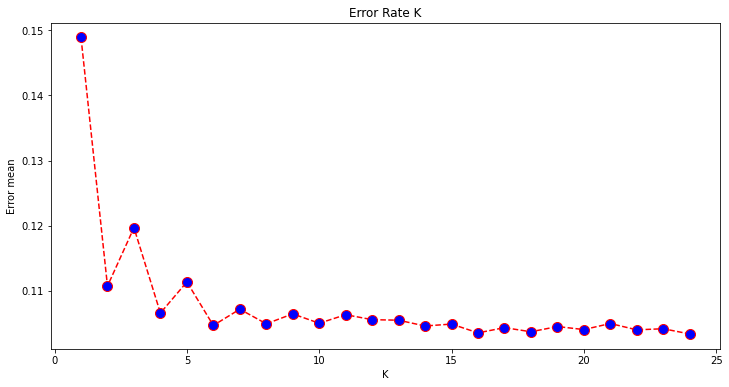

In [218]:
# plotting error rate of K-Means
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [219]:

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model using the training sets
knn.fit(x_train, y_train)

# Predict the response for test dataset
y_pred2 = knn.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8949792916913194


## Naive Bayes

In [220]:
# Create a Gaussian Classifier
model_nb = GaussianNB()

# Train the model using the training sets
model_nb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred3 = model_nb.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.8942608401656664


## Decison Tree

In [221]:
from sklearn.metrics import accuracy_score
modeldtc=DecisionTreeClassifier().fit(x_train,y_train)
#modeldtc=DecisionTreeClassifier().fit(x_train,y_train)
modeldtc

DecisionTreeClassifier()

In [222]:
y_train_prediksi_dtc = modeldtc.predict(x_train)
y_train_prediksi_dtc
performance_modeldtc = modeldtc.score(x_train,y_train)
#performance_modeldtc = modeldtc.score(x_train,y_train_prediksi_dtc)
performance_modeldtc

0.9995632941706816

In [223]:
y_pred4 = modeldtc.predict(x_test)
akurasi_dtc = accuracy_score(y_test, y_pred4, normalize = True) 
akurasi_dtc

0.853900769165751

## Random Forest

In [224]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#model = GaussianNB().fit(x_train,y_train)
#model = DecisionTreeClassifier().fit(x_train,y_train)
model_RF = RandomForestClassifier().fit(x_train,y_train)
model_RF
#(31,33,2,54,5,6)

RandomForestClassifier()

In [225]:
y_train_prediksi_rfc = model_RF.predict(x_train)
y_train_prediksi_rfc
performance_modelrfc = model_RF.score(x_train,y_train)
#performance_modelrfc = modelrfc.score(x_train,y_train_prediksi_rfc)
performance_modelrfc

0.9995492068858648

In [226]:
y_pred5 = model_RF.predict(x_test)
akurasi_rfc = accuracy_score(y_test, y_pred5, normalize = True) 
akurasi_rfc

0.8970078607049278

# Akurasi berbagai model

In [227]:
print("Logistic Regression:", accuracy_score(y_test, y_pred1))
print("KNN:", accuracy_score(y_test, y_pred2))
print("Naive Bayes:", accuracy_score(y_test, y_pred3))
print("Decision Tree:", accuracy_score(y_test, y_pred4))
print("Random Forest", accuracy_score(y_test, y_pred5))

Logistic Regression: 0.8880060857070409
KNN: 0.8949792916913194
Naive Bayes: 0.8942608401656664
Decision Tree: 0.853900769165751
Random Forest 0.8970078607049278


Model Random Forest merupakan model terbaik diantara 5 model tersebut.

In [228]:
import numpy as np
data1 = np.array([8,.9,1031]).reshape(1,-1)
data1.shape

(1, 3)

In [229]:
data2 = np.array([8,1,1031]).reshape(1,-1)


In [230]:
model_RF.predict(data1)

array([1])

In [231]:
model_RF.predict(data2)

array([0])

In [232]:
import pickle
pickle.dump(model_RF,open('./model_RFC.pkl','wb'))

## hasil pickle.dump dari model ini berukuran lebih dari 100 mb, sehingga kesulitan untuk upload di heroku, 

## lalu kami  menyiapkan file percobaan di github : https://github.com/alfansukmana04/coba 
## dengan file hasil pickle.dump yang < 1mb dan dapat dideploy di heroku dengan alamat:  https://model-2.herokuapp.com/

In [233]:
import pickle
model_open = pickle.load(open('./model_RFC.pkl','rb'))

In [234]:
model_open.predict(data1)

array([1])

In [235]:

model_open.predict(data2)

array([0])

# Kesimpulan
Akhirnya diperoleh model yang mamanfaatkan machine learning sebagai pembangunnya yaitu Model Random Forest. Model ini dapat memberikan prediksi kondisi presipitasi berupa Hujan atau salju suatu waktu di kota Szeged jika diketahui 3 unsur penting cuaca yaitu Kecepatan Angin, Kelembapan dan Tekanan Udara.

### seluruh file untuk keperluan model deployment, kecuali file pickle model_RFC.pkl diunggah pada github https://github.com/alfansukmana04/Final_Project